In [65]:
import pandas as pd
import numpy as np

df=pd.read_csv('VideoGamesSales.csv')

# no of rows df.shape[0]
# columns df.shape[1]

#check for duplicates df=df[df.duplicated()]
# check number of duplicates
df=df.drop_duplicates()
#df.info()
df['Region']=df['Region'].fillna('North')
#df=df[df['Region'].isnull()]
df['NA_Sales']=df['NA_Sales'].replace('[$]', '', regex=True)
df['NA_Sales']=pd.to_numeric(df['NA_Sales'], errors='coerce')

Average_Sales=df['NA_Sales'].mean()
Average_Sales=round(float(Average_Sales),2)
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)
df['Country']=df['Country'].replace({'USA' : 'United States'})
df['Country']=df['Country'].str.title()
#df=df[df['Country'] == 'United States']
df=df.rename(columns={'NA_Sales' : 'National Sales', 'Global_Sales' : 'Global Sales', 'NA_Profit' : 'National Profit', 'Global_Profit' : 'Global Profit'})
sales_cap = df['Global Sales'].quantile(0.95)
sales_cap
df['National Sales']= np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,4.038,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,4.038,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,4.038,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,4.038,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,4.038,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.210,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.150,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.240,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.170,0.30,0.051,0.090


In [66]:
df.to_csv('modified.csv', index=False)

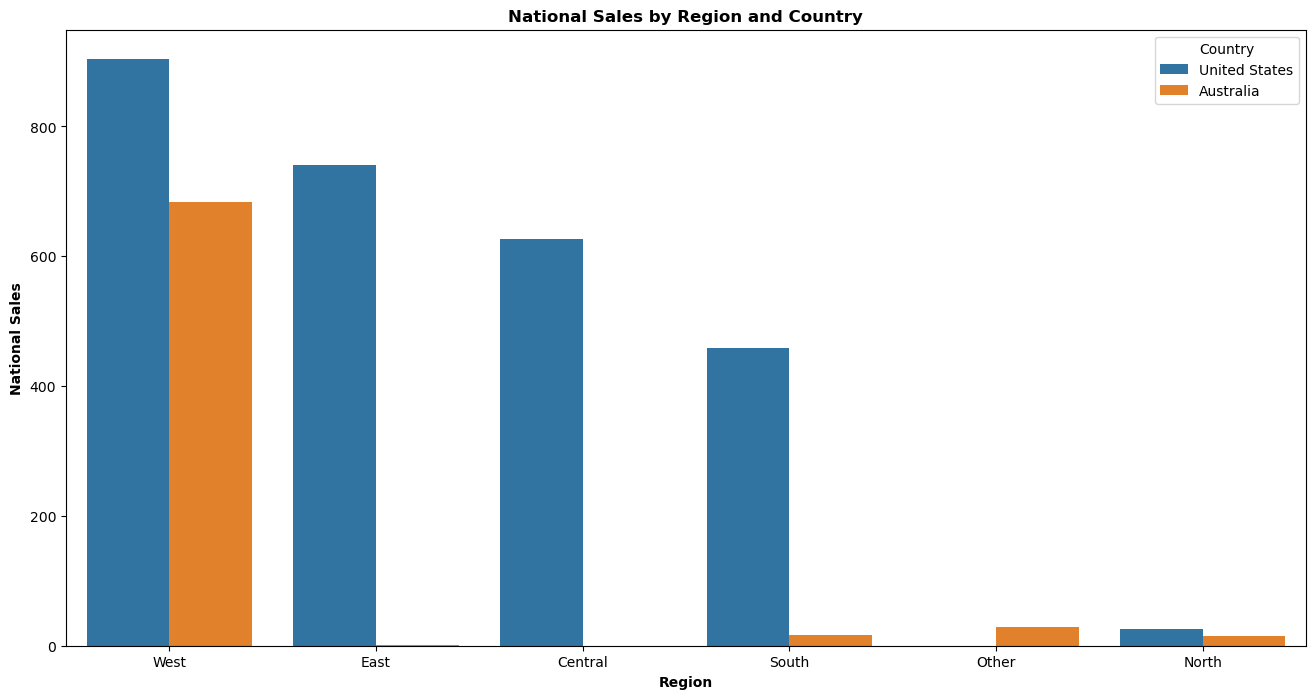

In [82]:


import matplotlib.pyplot as plt
import seaborn as sns
#df.shape[0]
df

# create a barchart
National_Sales = df.groupby(['Region', 'Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales

plt.figure(figsize=(16, 8))
sns.barplot(data=National_Sales, x='Region', y='National Sales', hue='Country')
plt.title('National Sales by Region and Country', fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

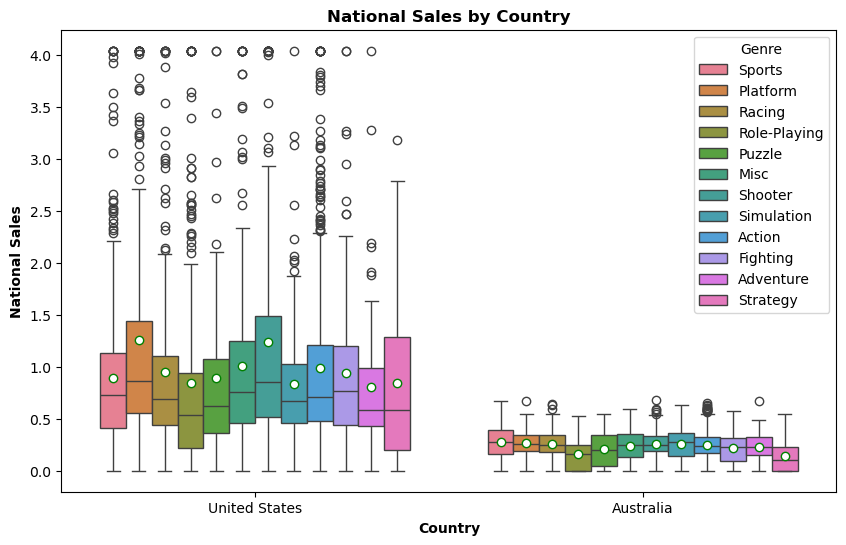

In [88]:
#create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='National Sales', data=df, hue='Genre', showmeans=True, meanprops={
    "marker": "o",
    "markerfacecolor": "white",
    'markersize': '6',
    'markeredgecolor' : 'green'})
plt.title('National Sales by Country', fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

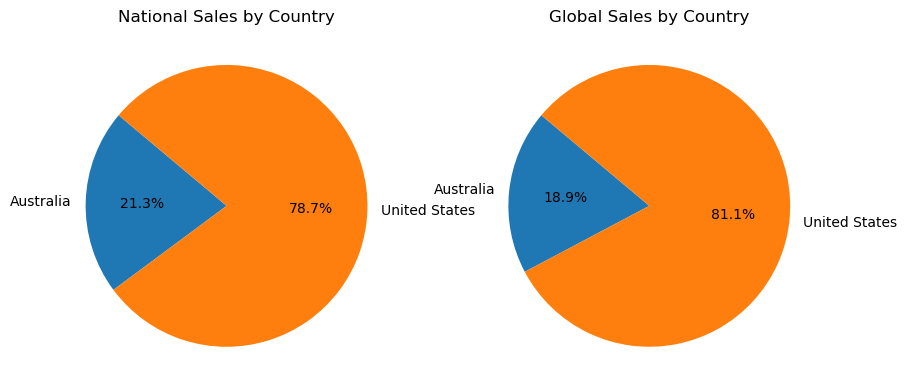

In [94]:
Sales=df.groupby(['Country'])[['National Sales', 'Global Sales']].sum().reset_index()
Country=Sales['Country']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']

fig, axs = plt.subplots(1,2, figsize=(10, 7))
axs[0].pie(National_Sales, labels=Country ,autopct='%1.1f%%', startangle=140)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country,autopct='%1.1f%%', startangle=140)
axs[1].set_title('Global Sales by Country')
plt.show()
